# ATAC-Seq Pipeline running a workflow in a Jupyter Notebook

This is a Jupyter notebook that combines an ATACSeq pipeline running in Nextflow with an interactive data analysis performing.

The repository found [here](https://github.com/NCBI-Hackathons/ATACFlow) contains both the workflow and this Jupyter notebook. It was developed during the Rocky Mountains Genomics HackCon 2018 in Boulder, Colorado.

There is currently two general ways to run the Notebook

The workflow is configured to run with either conda, Docker or singularity.

### Step 1: Export Amazon Web Services Keys (Optional)
If you wish to run with Amazon Batch, simply enter your AWS key and specify your s3 bucket.

### Step 2: Run the workflow
Below runs the workflow with locally using Docker

In [1]:
!nextflow run NCBI-Hackathons/ATACFlow -profile docker,test -r v0.1.1 -resume

N E X T F L O W  ~  version 0.30.1
Launching `NCBI-Hackathons/ATACFlow` [maniac_gutenberg] - revision: 4cf7a906e8 [v0.1.1]
WARN: Access to undefined parameter `sras` -- Initialise it to a default value eg. `params.sras = some_value`
[warm up] executor > local
                                          ,--./,-.
          ___     __   __   __   ___     /,-._.--~'
    |\ | |__  __ /  ` /  \ |__) |__         }  {
    | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                          `._,._,'

NCBI-Hackathons/ATACFlow v0.1.0"
Pipeline Name  : NCBI-Hackathons/ATACFlow
Pipeline Version: 0.1.0
Run Name       : maniac_gutenberg
Reads          : data/*{1,2}.fastq.gz
Genome Ref     : /Users/efloden/.nextflow/assets/NCBI-Hackathons/ATACFlow/test-data/genome/genome.fa
Bowtie2 Index  : /Users/efloden/.nextflow/assets/NCBI-Hackathons/ATACFlow/test-data/bowtie2-index/genome
Data Type      : Paired-End
Max Memory     : 6 GB
Max CPUs       : 2
Max Time       : 2d
Output dir     : .

### Step 3: View the results of quality control


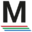
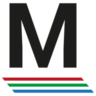
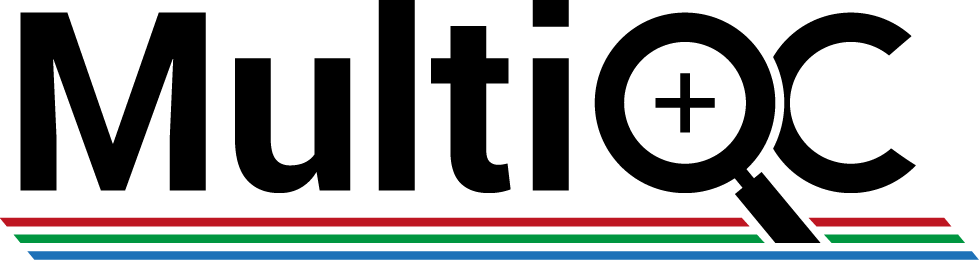
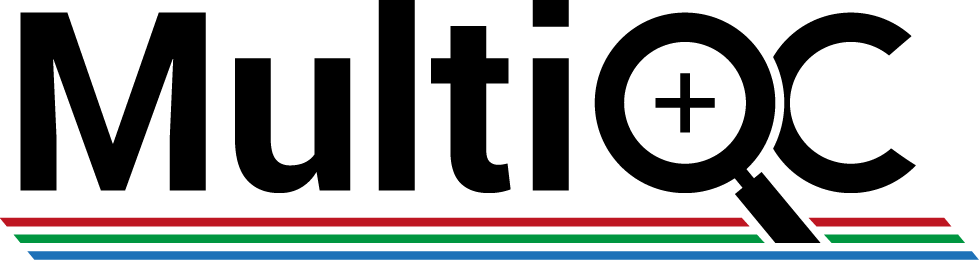
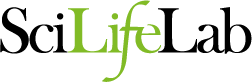

In [2]:
from IPython.display import HTML
HTML(filename="./results/MultiQC/multiqc_report.html")

### Step 4: Process the ATAC peaks for each sample
The script `process_atac` performs ...

In [3]:
!process_atac --prefix  'zhbtc4' --atac-peaks ./results/macs2/SRR5204807/SRR5204807_peaks.broadPeak \
  --motif-path motif-data
!process_atac --prefix  'zhbtc4' --atac-peaks ./results/macs2/SRR5204808/SRR5204808_peaks.broadPeak \
  --motif-path motif-data

Starting --- 2018-06-29 12:06:20.289794
ATAC mean width: 736 bp (std: 555 bp). Determined an evaluation radius of 923 bp
Processing motif files in motif-data/*
All done --- 2018-06-29 12:06:20.296619
Starting --- 2018-06-29 12:06:21.709609
ATAC mean width: 776 bp (std: 545 bp). Determined an evaluation radius of 933 bp
Processing motif files in motif-data/*
All done --- 2018-06-29 12:06:21.715351


### Step 5: Perform differential analysis on between the samples

In [10]:
!differential_md_score -x './sample_data/ZHBTC4' -1 'Control' -2 'Tamoxifen' -p 0.0000001

Starting --- 2018-06-29 12:15:00.556783
Done gathering data, ready to plot --- 2018-06-29 12:15:00.564413
KLF1_MOUSE.H10MO.C (-0.070, p-value = 6.63E-09)
NANOG_MOUSE.H10MO.A (-0.289, p-value = 5.42E-36)
NFKB2_MOUSE.H10MO.D (-0.188, p-value = 2.82E-12)
PO5F1_MOUSE.H10MO.A (-0.287, p-value = 4.03E-30)
REST_MOUSE.H10MO.A (-0.100, p-value = 3.52E-12)
RREB1_MOUSE.H10MO.D (-0.015, p-value = 3.19E-10)
SMAD2_MOUSE.H10MO.D (0.054, p-value = 5.66E-13)
SOX2_MOUSE.H10MO.A (-0.266, p-value = 5.54E-21)
SP4_MOUSE.H10MO.D (0.020, p-value = 1.71E-20)
All done --- 2018-06-29 12:15:04.452020


In [ ]:
### Step 6: Plot the results

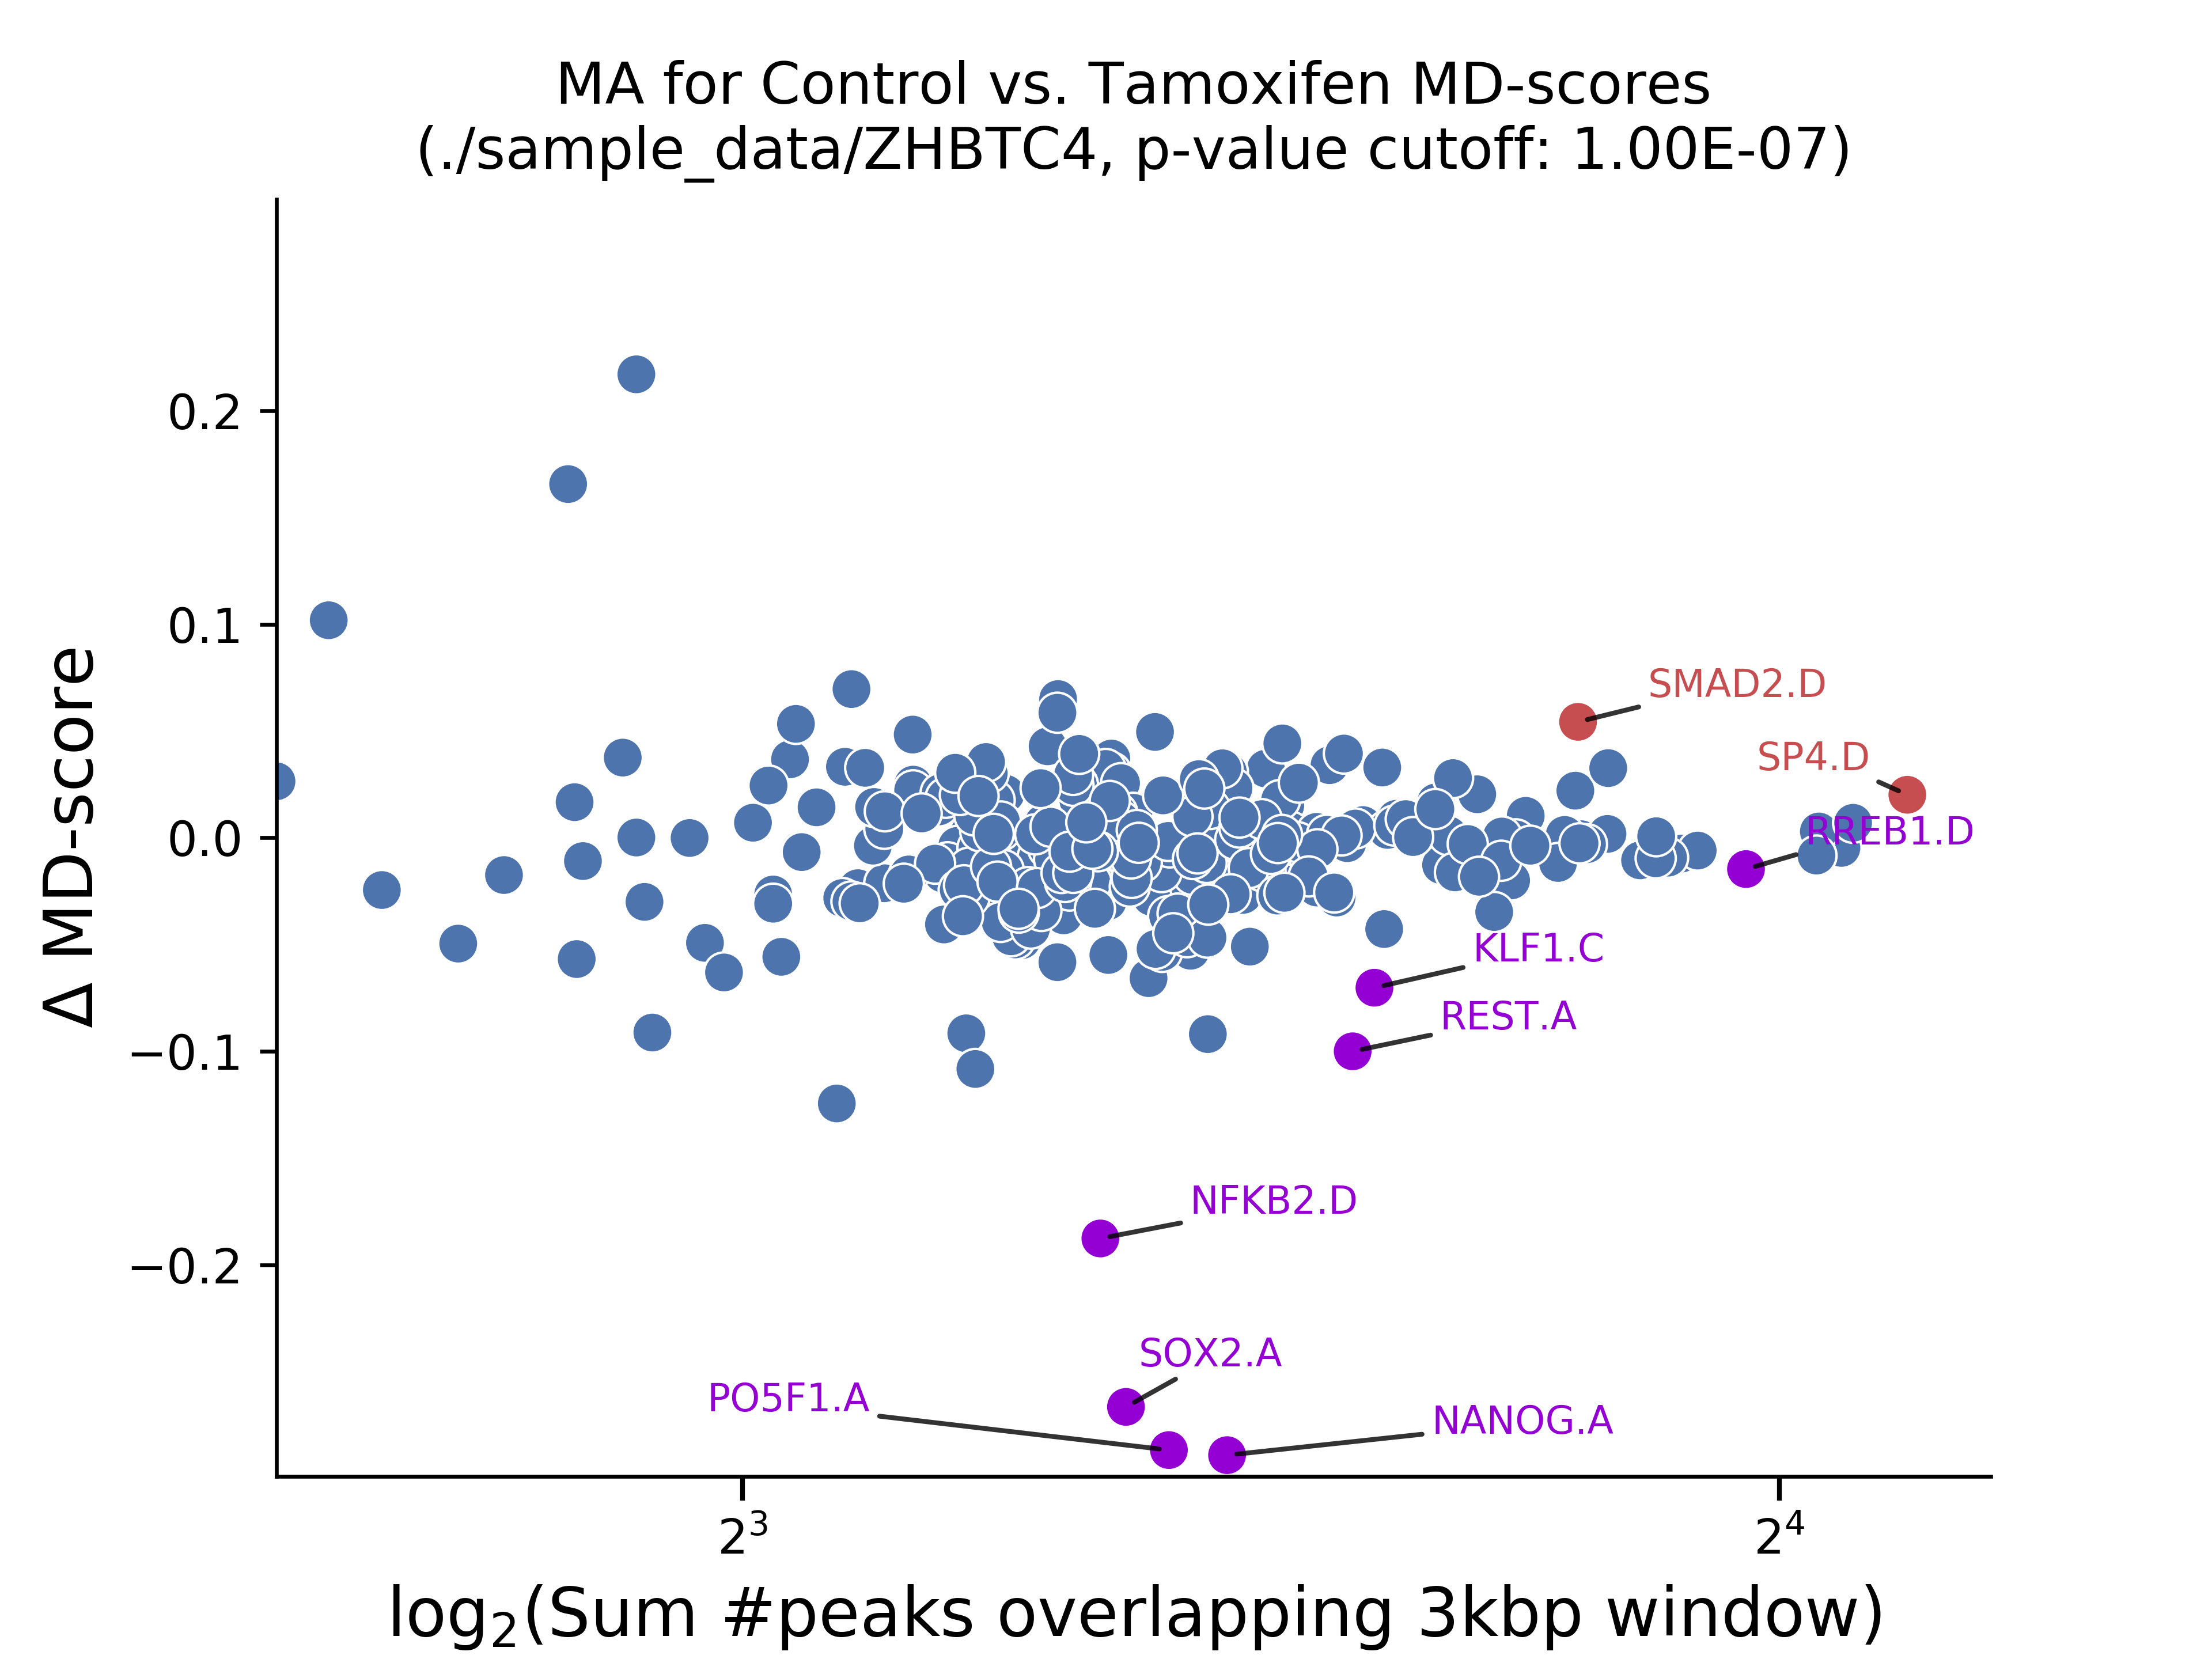

In [11]:
from IPython.display import Image
Image(filename='sample_data/ZHBTC4_MA_Control_to_Tamoxifen_md_score.png')